In [1]:
import pandas as pd

from SMILESX import embeddingvis, token, interpret, utils
%matplotlib inline

RDKit WARNING: [18:50:08] Enabling RDKit 2019.09.2 jupyter extensions


#### Definition of data

In [2]:
validation_data_dir = "./validation_data/"

In [3]:
extension = '.csv'

In [4]:
data_name = 'FreeSolv' # FreeSolv, ESOL, Lipophilicity
prop_tag = ''

In [5]:
if data_name == 'FreeSolv':
    data_filename = 'FreeSolv_SAMPL'
    prop_tag = 'expt'
elif data_name == 'ESOL':
    data_filename = 'ESOL_delaney-processed'
    prop_tag = 'measured log solubility in mols per litre'
elif data_name == 'Lipophilicity':
    data_filename = 'Lipophilicity'
    prop_tag = 'exp'
else:
    data_filename = data_name
    prop_tag = prop_tag

In [6]:
sol_data = pd.read_csv(validation_data_dir+data_filename+extension)

In [7]:
sol_data.head(3)

,Unnamed: 0,iupac,smiles,expt,calc
0,0,"4-methoxy-N,N-dimethyl-benzamide",COc1ccc(C(=O)N(C)C)cc1,-11.01,-9.625
1,1,methanesulfonyl chloride,CS(=O)(=O)Cl,-4.87,-6.219
2,2,3-methylbut-1-ene,C=CC(C)C,1.83,2.452


In [8]:
sol_data = sol_data[['smiles',prop_tag]]

In [9]:
sol_data.head()

,smiles,expt
0,COc1ccc(C(=O)N(C)C)cc1,-11.01
1,CS(=O)(=O)Cl,-4.87
2,C=CC(C)C,1.83
3,CCc1cnccn1,-5.45
4,CCCCCCCO,-4.21


In [10]:
sol_data.shape

(642, 2)

#### **SMILES check from RDKit**

In [11]:
sol_data, bad_smiles_list = utils.check_smiles(sol_data)

In [12]:
sol_data.shape

(642, 2)

In [13]:
sol_data.iloc[:,1].values.shape

(642,)

#### Embedding Visualization

****************************************************
***SMILES_X for embedding visualization starts...***
****************************************************

0-fold initiated.
Splitting of the dataset.
No data augmentation required.

Number of enumerated SMILES from the training set: 428.
Tokenization of SMILES from the training set.
Tokens from the training set: ['I', ')', ' ', 'F', '#', 'n', '[nH]', 'Br', 'O', '[C@@H]', 'P', '[C@]', 'N', '1', '=', 'Cl', '[O-]', '/', '[C@@]', '-', 'C', 'c', '2', '(', '[C@H]', 's', '3', '[N+]', '4', '5', 'S']
Number of tokens only present in the training set: 31

Full vocabulary ("train+valid+test" tokens): ['pad', 'unk', 'P', '/', 'Br', 's', 'F', 'O', '4', 'n', '1', '2', ' ', '(', '[C@@H]', '5', '=', '[C@H]', '[C@@]', '[nH]', 'I', '-', 'Cl', '3', '[C@]', '[O-]', 'N', 'C', 'S', '#', ')', '[S+2]', 'c', '[N+]'], of size: 34

PCA on the 0-fold model's embedding of all the tokens.
(Tokens from (circles) and out of (crosses) the training set are shown. Co

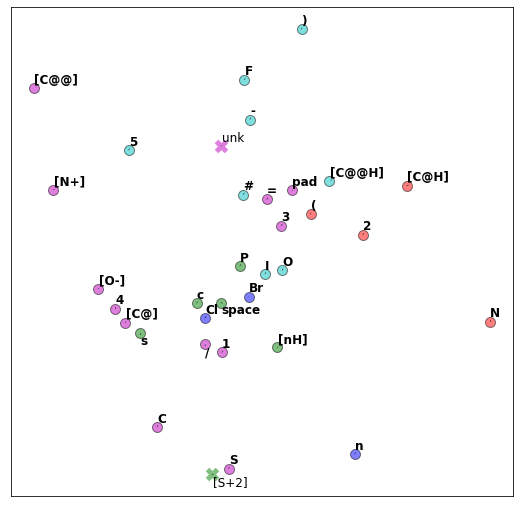


************************************************
***SMILES_X for embedding visualization done.***
************************************************



In [15]:
embeddingvis.Embedding_Vis(data=sol_data, 
                          data_name=data_name, 
                          k_fold_number = None,
                          k_fold_index = 0,
                          augmentation = False, 
                          indir = "./data/", 
                          outdir = "./data/", 
                          affinity_propn = True)

#### Find tokens in SMILES

In [16]:
token.TokensFinder(data=sol_data, 
                   augmentation = False, 
                   token_tofind = '[nH]', 
                   verbose = 0)

***************************************
***SMILES_X token's finder starts...***
***************************************

No data augmentation required.
Tokenization of provided SMILES.

>>> The finder is processing the search... >>>

13 SMILES found with [nH] token in the training set.

**********************************************************
***SMILES_X token's finder has terminated successfully.***
**********************************************************



#### SMILES inference interpretation

In [14]:
Interpretation_class = interpret.Interpretation(data=sol_data, 
                                                data_name=data_name, 
                                                data_units='', 
                                                k_fold_number = None,
                                                k_fold_index = None,
                                                augmentation = False, 
                                                indir = "./data/", 
                                                outdir = "./data/", 
                                                font_size = 15, 
                                                font_rotation = 'vertical')

1 Physical GPUs, 1 Logical GPUs detected and configured.
1 GPU device(s) will be used.

No data augmentation is required.
Full vocabulary: ['pad', 'unk', 'P', '/', 'Br', 's', 'F', 'O', '4', 'n', '1', '2', ' ', '(', '[C@@H]', '5', '=', '[C@H]', '[C@@]', '[nH]', 'I', '-', 'Cl', '3', '[C@]', '[O-]', 'N', 'C', 'S', '#', ')', '[S+2]', 'c', '[N+]'], of size: 34.
Maximum length of tokenized SMILES: 47 tokens.

********************************************
***SMILES_X for interpretation initiated.***
********************************************



************************************
***SMILES_X Interpreter starts...***
************************************

Checking the SMILES list for inference.
Number of enumerated SMILES: 5.
Tokenization of SMILES.



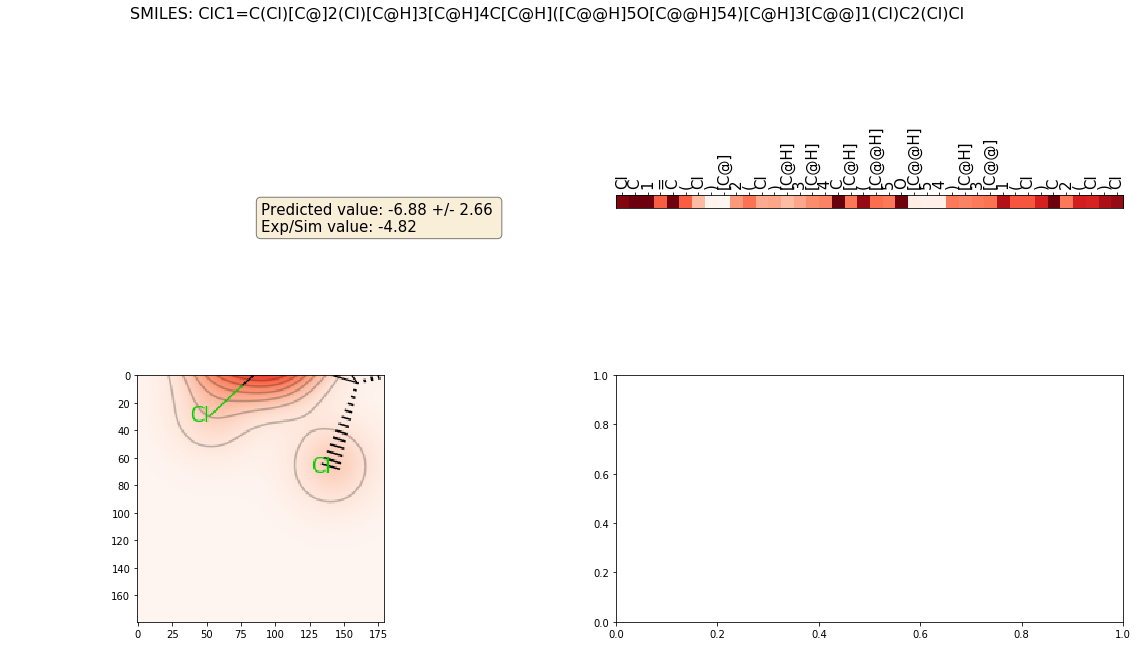

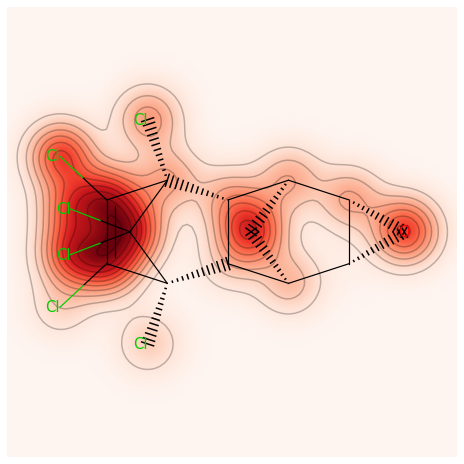

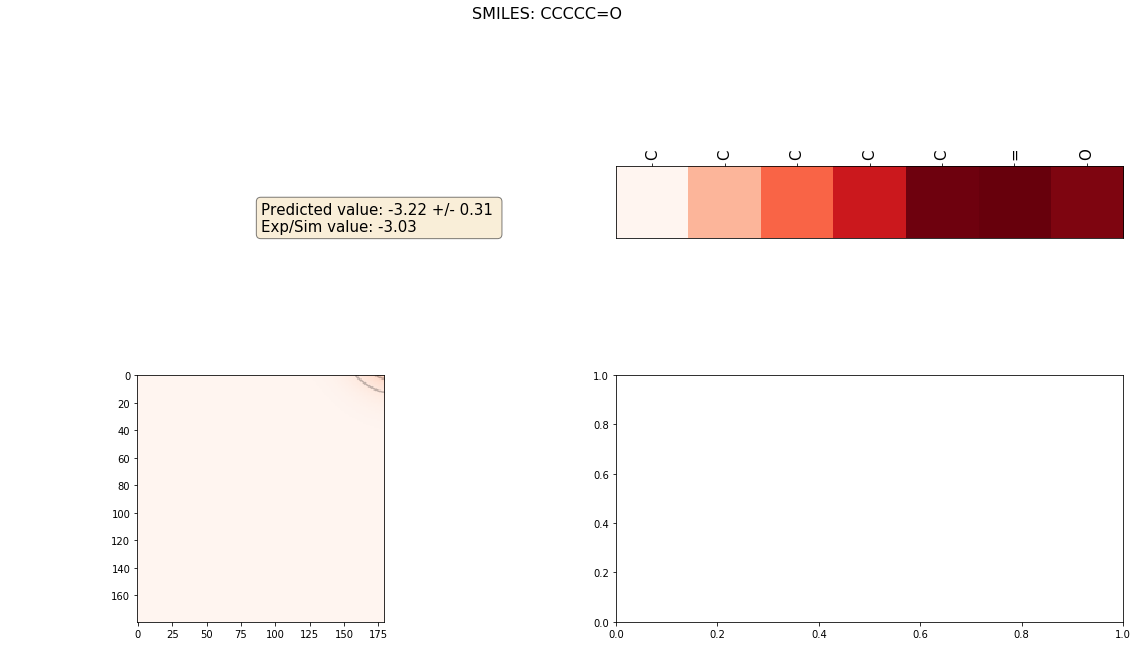

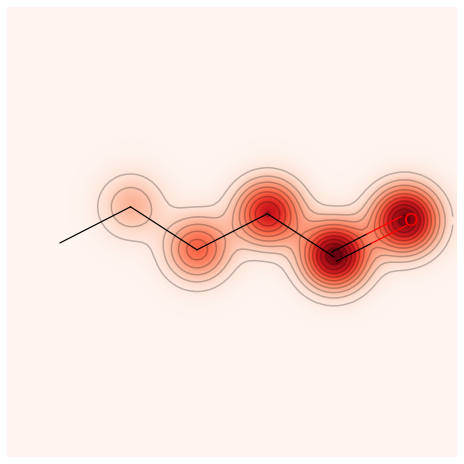

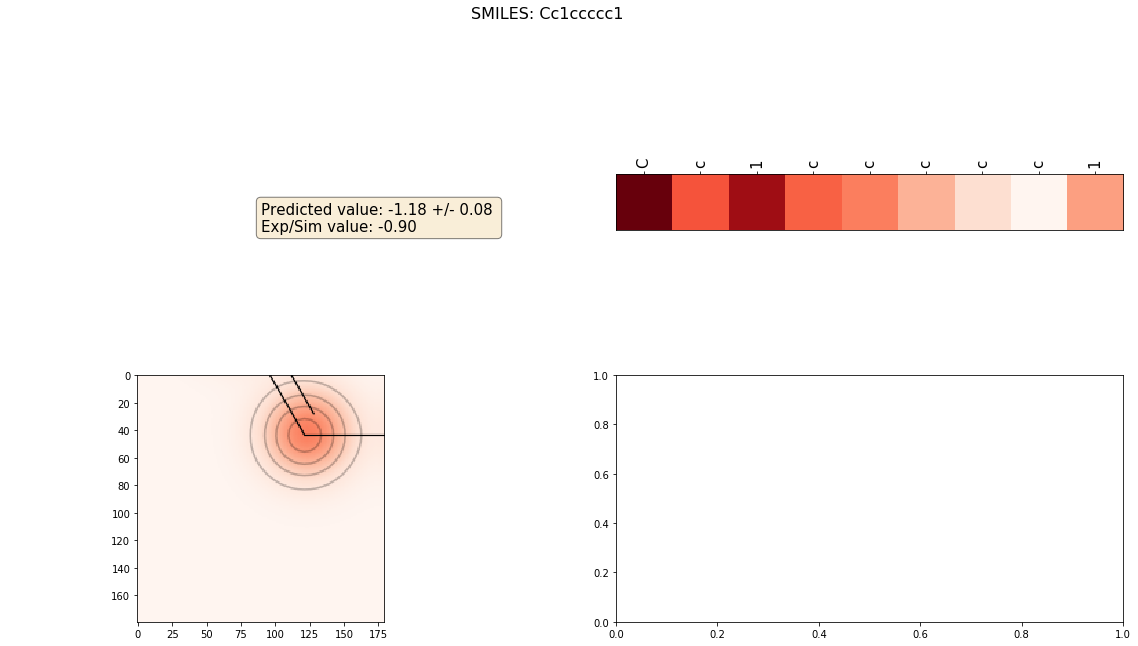

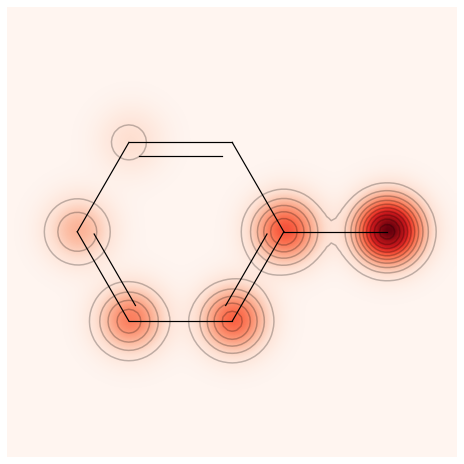

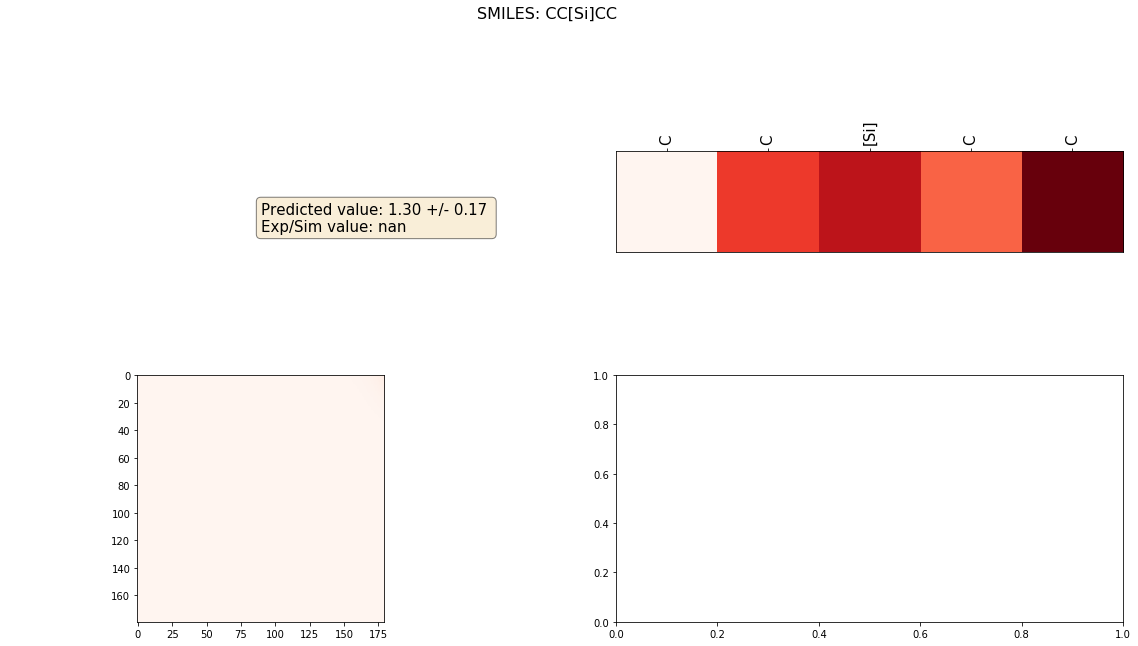

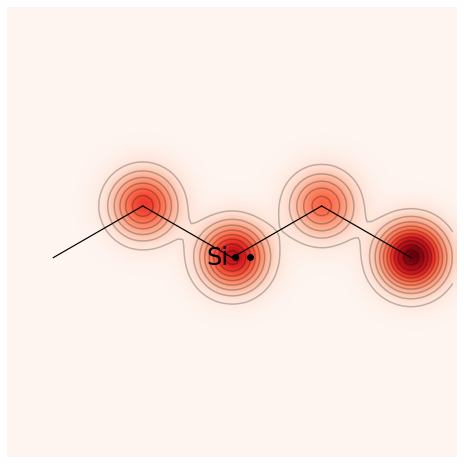

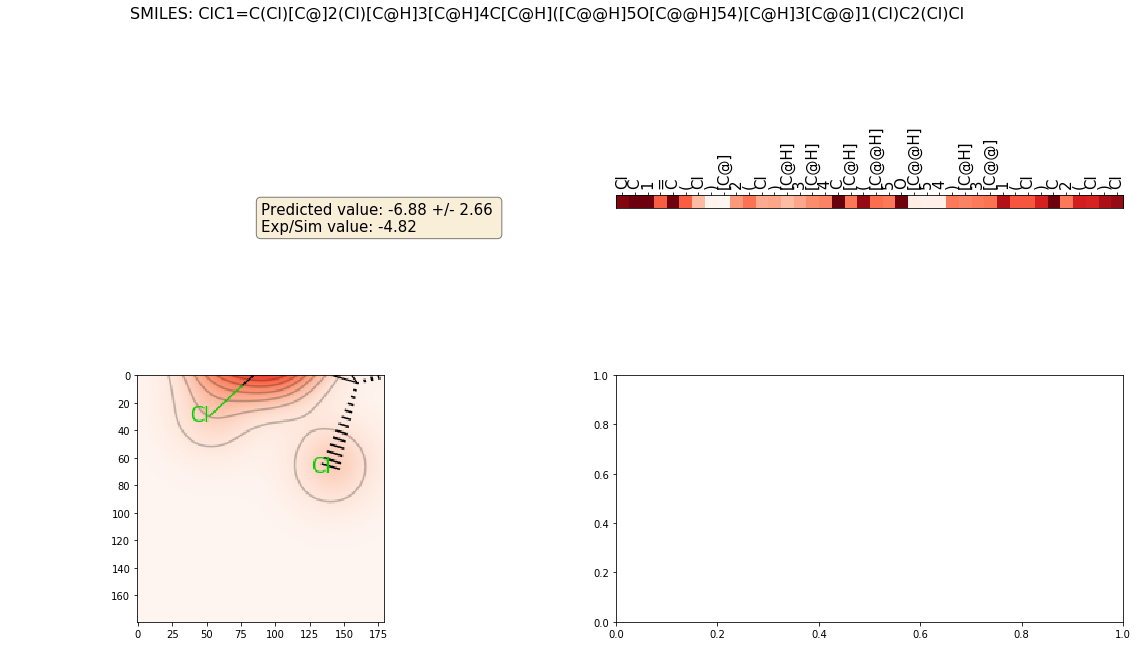

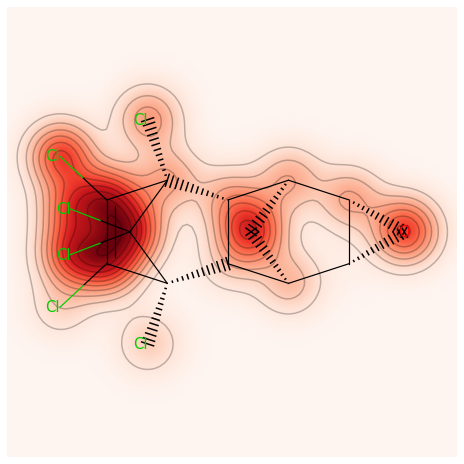

In [15]:
Interpretation_class.interpret(smiles_list = ['ClC1=C(Cl)[C@]2(Cl)[C@H]3[C@H]4C[C@H]([C@@H]5O[C@@H]54)[C@H]3[C@@]1(Cl)C2(Cl)Cl', 
                                              'CCCCC=O', 
                                              'c1ccccc1C', 
                                              'CC[Si]CC',
                                              'ClC1=C(Cl)[C@]2(Cl)[C@H]3[C@H]4C[C@H]([C@@H]5O[C@@H]54)[C@H]3[C@@]1(Cl)C2(Cl)Cl'], 
                               num_precision = 2)